In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filepath ="/content/StudentsPerformance.csv"
df= pd.read_csv(filepath)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
print(df['math score'].mean())
print(df['math score'].median())
print(df['math score'].mode())

66.089
66.0
0    65
Name: math score, dtype: int64


In [ ]:
print(df['reading score'].mean())
print(df['reading score'].median())
print(df['reading score'].mode())

69.169
70.0
0    72
Name: reading score, dtype: int64


In [ ]:

print(df['math score'].var())
print(df['math score'].std())


229.91899799799847
15.163080096009468


In [ ]:
Q1=df['math score'].quantile(0.25)
Q3=df['math score'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

20.0


In [ ]:
outliers = df[(df['math score'] < Q1 - 1.5*IQR) | (df['math score'] > Q3 + 1.5*IQR)]
print(outliers)

     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38         

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean= df[(df['math score'] >= lower_bound) & (df['math score'] <= upper_bound)]
print(df_clean)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [ ]:
print("Original size:", len(df))
print("After outlier removal:", len(df_clean))

Original size: 992
After outlier removal: 992


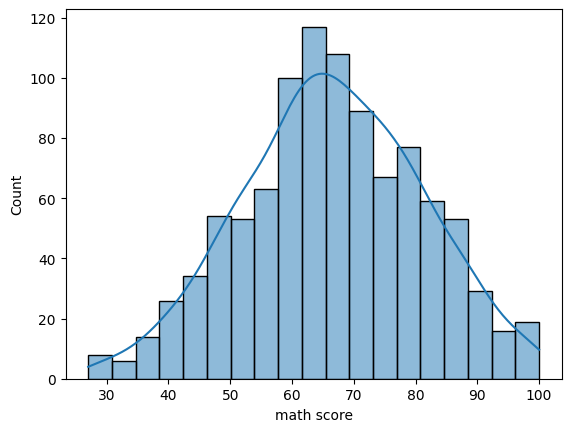

P-value: 0.009671989318432009
Not Gaussian


In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if a column is normally distributed
sns.histplot(df['math score'], kde=True)
plt.show()

# Shapiro-Wilk test (for normality)
stat, p = stats.shapiro(df['math score'])
print("P-value:", p)
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Not Gaussian")
